# **Fraudulent credit card transaction analysis using SVC Classifier**

Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [ ]:
import numpy as np
import pandas as pd

Importing the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

In [ ]:
df = pd.read_csv('fraud_data.csv')
bincount = np.bincount(df['Class'])
bincount

array([21337,   356])

In [ ]:
df = pd.read_csv('fraud_data.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [ ]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
    bincount = np.bincount(df.Class)
    return (bincount[1]/(bincount[1]+bincount[0]))

In [ ]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('readonly/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), training a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

In [ ]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    dm_reg= DummyClassifier(strategy ='most_frequent').fit(X_train, y_train)
    y_test_pred= dm_reg.predict(X_test)
    return (accuracy_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred))

Using X_train, X_test, y_train, y_test (as defined above), training a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

In [ ]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC

    svc_reg= SVC().fit(X_train, y_train)
    y_test_pred= svc_reg.predict(X_test)
    return (accuracy_score(y_test, y_test_pred), recall_score(y_test, y_test_pred), precision_score(y_test, y_test_pred))

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, obtaining the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

In [ ]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svc_reg2= SVC(gamma=1e-07, C=1e9).fit(X_train, y_train)
    y_test_pred= svc_reg2.decision_function(X_test) > -220   
    confusion = confusion_matrix(y_test, y_test_pred)

    return confusion

Training a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, creating a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

<IPython.core.display.Javascript object>


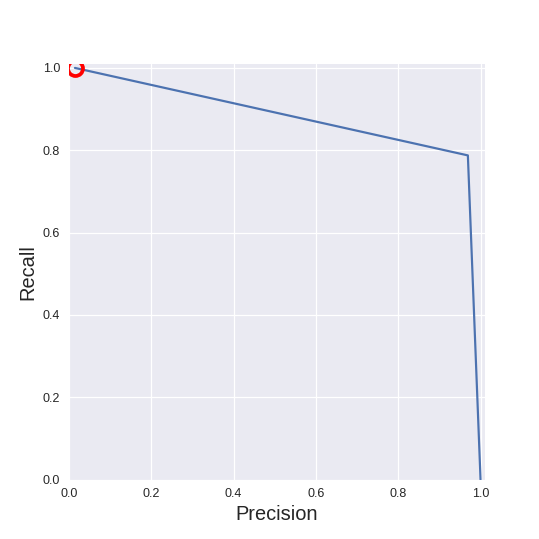

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

lr = LogisticRegression().fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure(figsize=(6,6))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


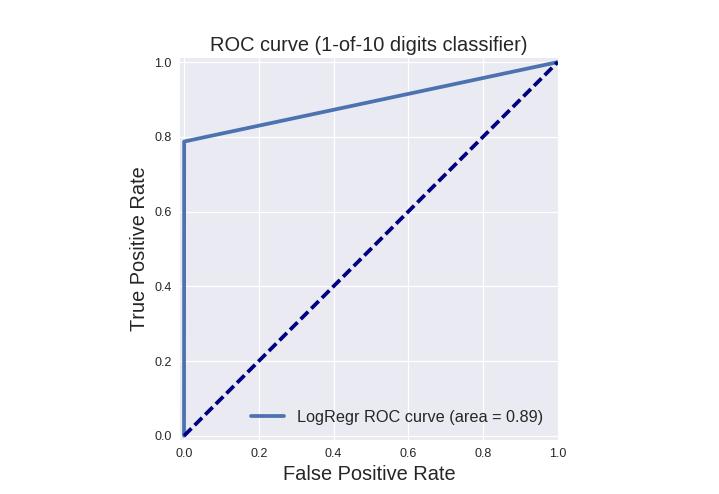

In [ ]:
roc_auc = auc(fpr, tpr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
def answer_five():
    return (0.83, 0.83)

Performing a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, creating an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

In [ ]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression().fit(X_train, y_train)
    grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
    grid_clf_rec = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    grid_clf_rec.fit(X_train, y_train)
    return np.array(grid_clf_rec.cv_results_['mean_test_score']).reshape(5,2)
answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

<IPython.core.display.Javascript object>


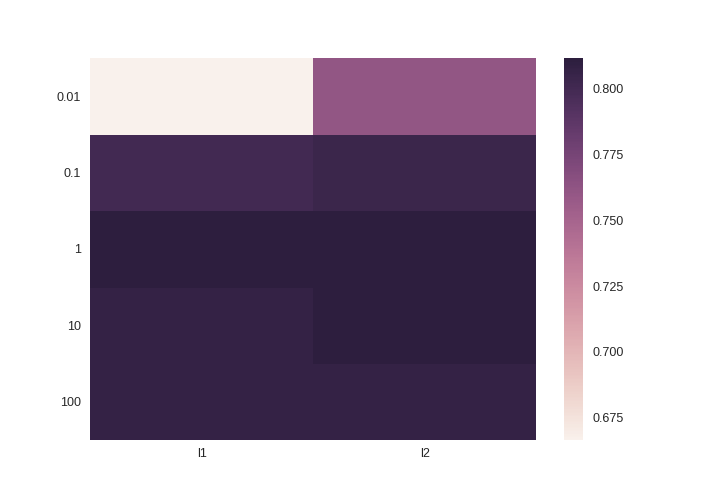

In [ ]:
# Using the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())